# Clustering

## 1. K-means y DBSCAN

En esta primera parte, vamos a trabajar con los métodos K-means y DBSCAN.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. La idea será utilizar los métodos de clustering estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [ ]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

Grafiquemos los datasets para ver las diferencias entre cada uno.

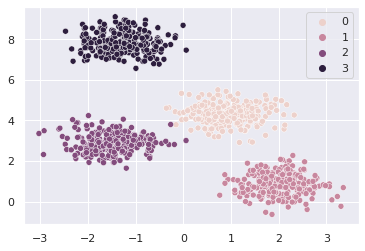

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

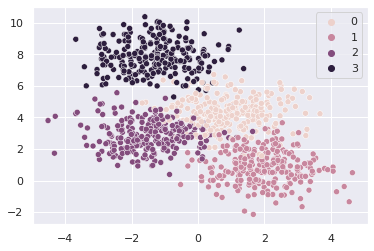

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

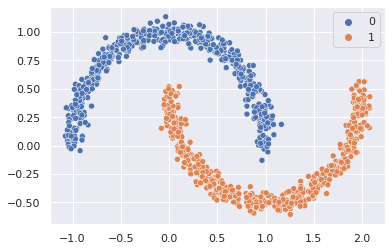

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

### 1.1 K-means

Scikit-Learn tiene una implementación de K-means.

1. Lee la documentación.

2. Define los 3 modelos para los distintos datasets.

In [ ]:
from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
# Especificamos el numero adecuado de clusters en cada caso
kmeans_1 = KMeans(n_clusters=4, random_state=0) #tiene 4 etiquetas por lo que se tienen que generar 4 centroides
#dataset2 mas pegoteado que el dataset1
kmeans_2 = KMeans(n_clusters=4, random_state=0)#tiene 4 etiquetas por lo que se tienen que generar 4 centroides
kmeans_3 = KMeans(n_clusters=2, random_state=0)#tiene 2 etiquetas por lo que se tienen que generar 4 centroides

3. Entrena los modelos con los datos, recuerda que NO hay que pasarles las etiquetas, solo los atributos.

In [ ]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.

In [ ]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)
#el numero de etiquetas coincide con el numero de muestras

(1000,)


In [ ]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)
#aca tengo las coordenadas en cada atributo

[[-1.49807428  2.90164881]
 [-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]]


In [ ]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

4.  Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


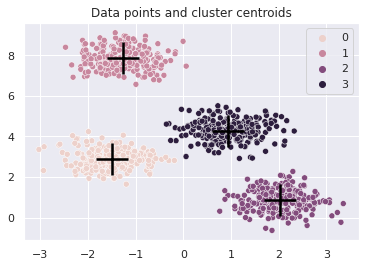

In [ ]:
sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1) #colorea segun la etiqueta que le da el kmeans con etiqueta 1
#aca no se ve pero para los puntos más pegados no obtiene el mismo color dado por la etiqueta real.
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


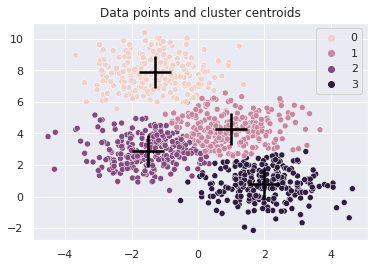

In [ ]:
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2)
sns.scatterplot(centros_2[:, 0], centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


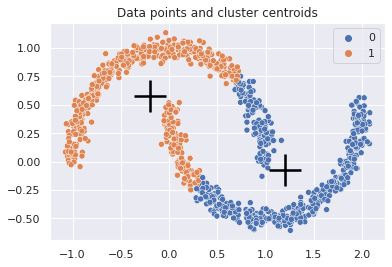

In [ ]:
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3)
sns.scatterplot(centros_3[:, 0], centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()
#se ve que estos datos no estarían bien separados las nubes de puntos

Para ver el acuerdo que hubo entre los clusters determinados por el algoritmos de clustering y los generados originalmente, podemos usar una matriz de confusión. Notemos que **no sabemos si los nombres de los clusters se corresponden entre sí**, el cluster 0 en los datos originales podría ser el cluster 1 en los calculados con k-means.

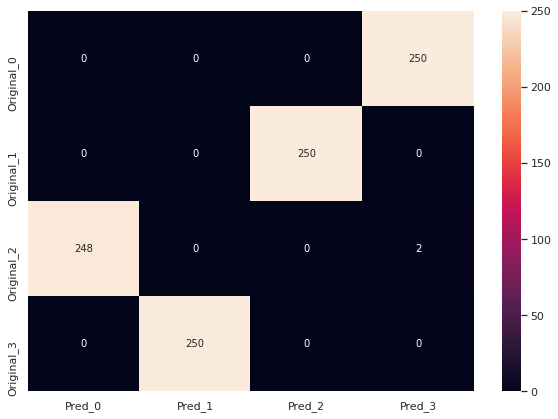

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

#si tengo las etiquetas del dataset puedo comparar con el resultado de las etiquetas que devuelve en kmean

#la forma de la matriz es porque los cluster le da un nombre que no siempre coinciden con el nombre de las etiquetas. No es algo malo.
#depende del orden y a cual ubica primero al darle nombre del cluster

5. Repite el ploteo de la matriz de confusión para los otros datasets. 


¿Se te ocurre alguna manera de cuantificar el acuerdo entre ambos sets de etiquetas (el original y el obtenido por clustering)?

Si en principio reordeno las etiquetas predichas para hacer matriz diagonal, puedo hacer el accuracy pero sólo con los aciertos no me alcanza para confirmar que la clusterización sea correcta. Hay que tener en cuenta los errores, hay que usar metricas propias de aprendizaje no supervisado. (hay que ver siempre qué errores comete)

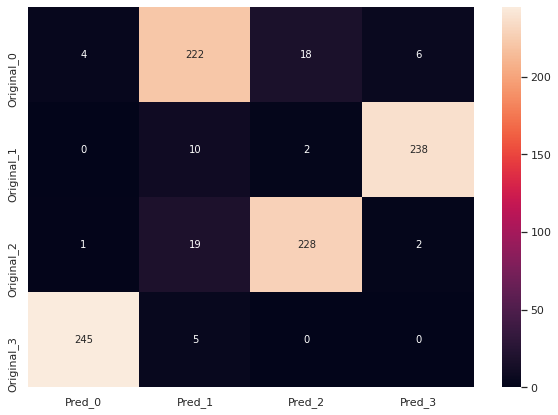

In [ ]:
cm = confusion_matrix(y2, etiquetas_2)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

#aca no identifica bien las instancias al centro del cluster, porque hay datos más pegados.


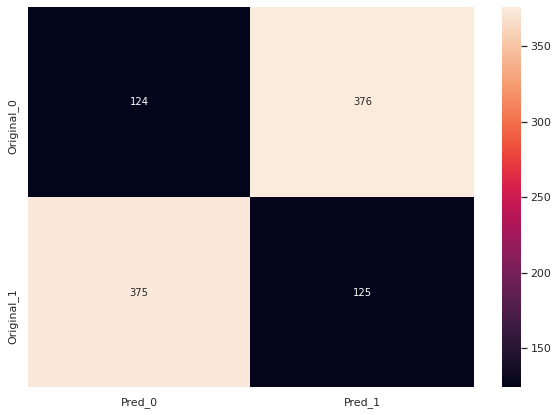

In [ ]:
cm = confusion_matrix(y3, etiquetas_3)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1']],
                  columns = [i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

6. Prueba qué sucede si no elige correctamente el número de clusters. ¿Se le ocurre cómo puede usar las matrices de confusión para darse cuenta que no eligió correctamente ese número?

la clusterización no tiene sentido porque puede juntar las nubes que estan separadas o busca subcluster dentro de una misma nube.
Y aparecen menos etiquetas predichas que reales, entonces aparecen columnas de cero en la confusion matrix.



### 1.2 DBSCAN

1. Lee la documentación.
2. Define los 3 modelos para los distintos datasets.

In [ ]:
from sklearn.cluster import DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
db_1 = DBSCAN(eps=0.3, min_samples=10)
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.3, min_samples=10)

3. Entrena los modelos con los distintos datasets

In [ ]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable `labels_`. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido. 

4. Teniendo en cuenta esto, podemos obtener el numero de clusters y el numero de instancias consideradas ruido de la siguiente forma (solo lo hacemos para el primer dataset):

In [ ]:
# Consultamos las etiquetas
labels_1 = db_1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of clusters: 4
Estimated number of noise points: 64


Les damos ya definida una función que plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [ ]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

5. Ploteamos el resultado para el primer caso. ¿Te parece adecuado el resultado? Prueba qué pasa si modifica los parámetros de epsilon y min_dist.

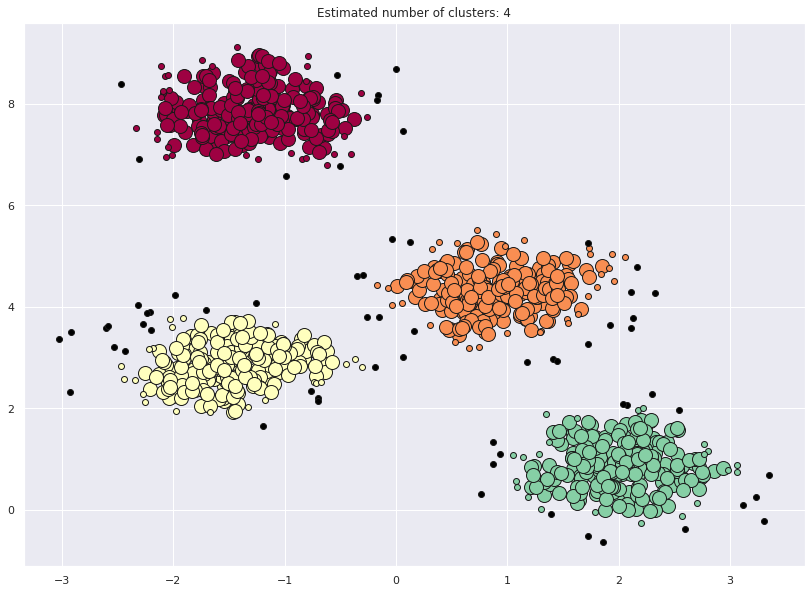

In [ ]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

6. Repetimos el paso 5 para los otros 2 datasets, nota que debe calcular `labels_2`, `core_samples_mask_2`, etc... Recomendación: vuelva a copiar todo el codigo en las siguientes celdas en lugar de modificar el que ya tiene escrito para el dataset 1. 

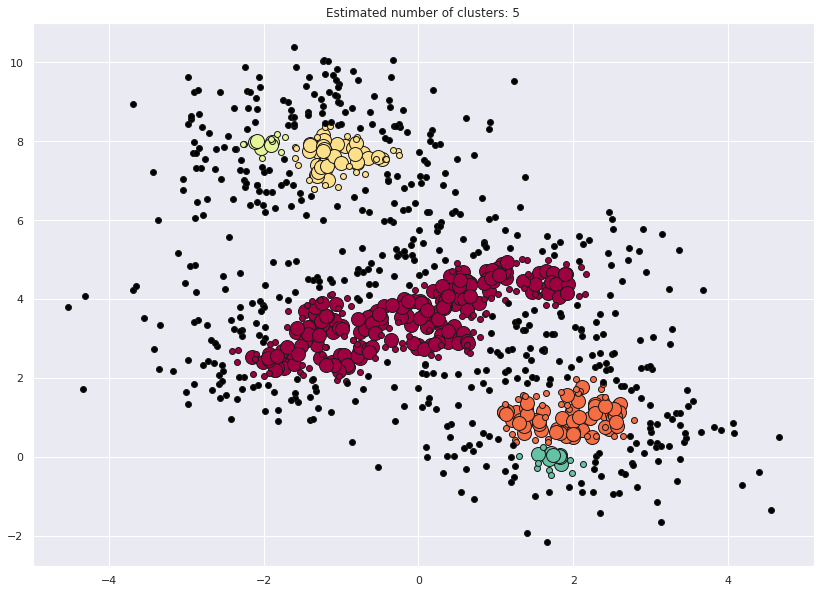

In [ ]:
# Consultamos las etiquetas
labels_2 = db_2.labels_
#core_samples_mask_ depende del labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

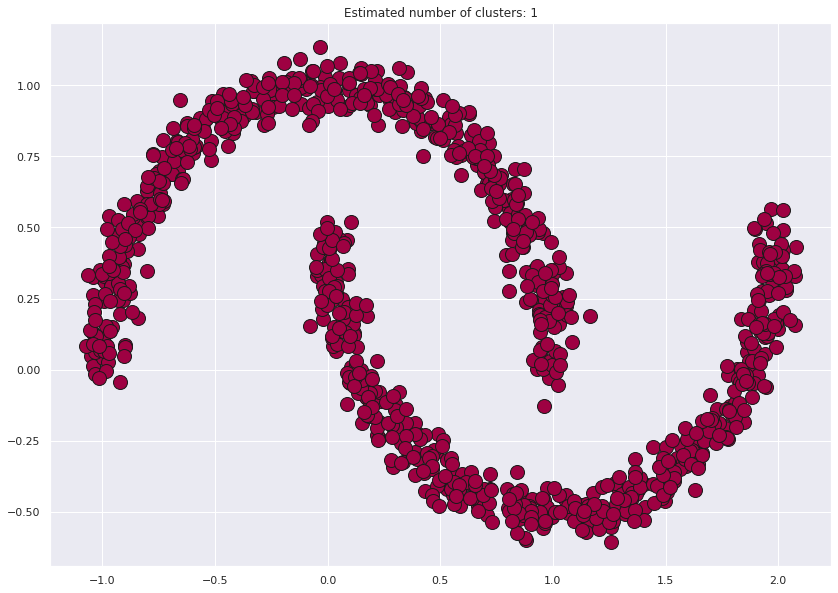

In [ ]:
# Consultamos las etiquetas
labels_3 = db_3.labels_
#core_samples_mask_ depende del labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

7. Ajustar los parametros `epsilon` y `min_dist` para lograr un resultado lo más parecido al dataset original posible.

8. A partir de los resultados obtenidos, reflexione sobre las fortalezas y debilidades de cada uno de los métodos.


## 2. ¡A probar con un dataset!

Elige un dataset que te interese y aplica las técnicas vistas. ¿Qué esperas obtener?¿Qué obtienes? Por ejemplo, puedes aplicarlo sobre el dataset Iris (¿qué ocurre si usas `n_clusters=2` y `n_clusters=3` en k-means?), o el dataset del proyecto.

In [ ]:
#https://github.com/suvoooo/Machine_Learning/blob/master/DBSCAN_Complete/DBSCAN_Medium.ipynb
#https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d
#!pip install  numpy matplotlib
#!pip install pillow

#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (73.1 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ws_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Weather_Radar_Stations.csv')
print('Shape of DataFrame: ',Ws_df.shape)


Shape of DataFrame:  (201, 7)


In [ ]:
# check the nan values in the dataframe 
Ws_df.isna().sum()

X                   0
Y                   0
OBJECTID            0
siteID              0
siteName            0
radarType           0
antennaElevation    0
dtype: int64

In [ ]:
Ws_df.dropna(inplace=True)
print("After Dropping Rows with NAN, shape of DF:" , Ws_df.shape)

After Dropping Rows with NAN, shape of DF: (201, 7)


In [ ]:

from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

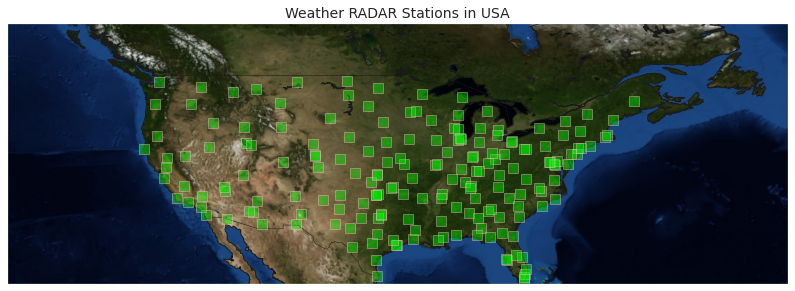

In [ ]:

llon=-140
ulon=-50
llat=25
ulat=55

# selecting the boundaries of the map from lattitude and longitude 

Ws_df = Ws_df[(Ws_df['X'] > llon) & (Ws_df['X'] < ulon) & 
                        (Ws_df['Y'] > llat) &(Ws_df['Y'] < ulat)]



my_map = Basemap(projection='cyl',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(Ws_df.X), np.asarray(Ws_df.Y))
Ws_df['xm']= xs.tolist()
Ws_df['ym'] =ys.tolist()

#Visualization1
for index,row in Ws_df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Weather RADAR Stations in USA", fontsize=14)
#plt.savefig("USA_WS.png", dpi=300)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


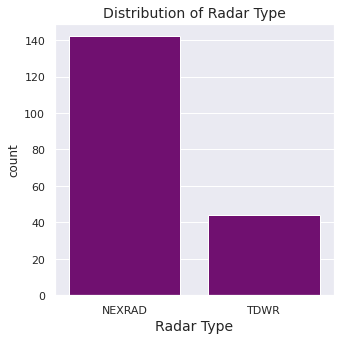

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(Ws_df['radarType'], color='purple')
plt.xlabel('Radar Type', fontsize=14)
plt.title("Distribution of Radar Type", fontsize=14)
#plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

In [ ]:
Ws_df['radarType'] = Ws_df['radarType'].map({'NEXRAD':1,'TDWR':0})

Ws_df.head()


,X,Y,OBJECTID,siteID,siteName,radarType,antennaElevation,xm,ym
0,-98.413046,45.455833,1,KABR,ABERDEEN,1,Unknown,-98.413046,45.455833
1,-106.823880,35.149722,2,KABX,ALBUQUERQUE,1,Unknown,-106.823880,35.149722
2,-77.007491,36.983889,3,KAKQ,NORFOLK,1,Unknown,-77.007491,36.983889
3,-101.709269,35.233333,4,KAMA,AMARILLO,1,Unknown,-101.709269,35.233333
4,-80.413048,25.610556,5,KAMX,MIAMI,1,Unknown,-80.413048,25.610556


In [ ]:

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = Ws_df[["radarType", "xm", "ym"]]

weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.8, min_samples=2).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[500:560])
Ws_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print(labels)

#-1 es que no se pudo agrupar (ruido o outliear que no cumple condiciones para agrupar)

[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1]


Cluster 0
Cluster 1
Cluster 2


Text(0.5, 1.0, 'Weather Radar Stations in USA Clustered (1): $ \\epsilon = 0.3$')

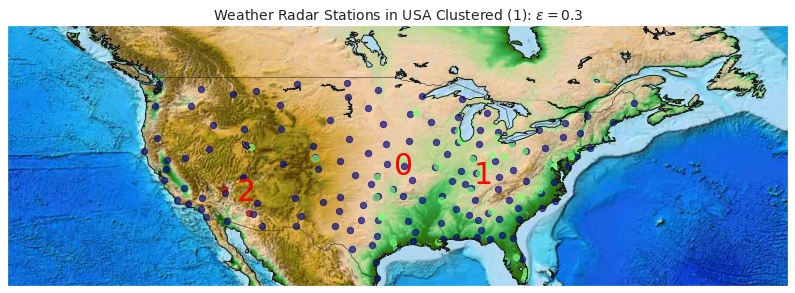

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='cyl',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = Ws_df[Ws_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number))
plt.title(r"Weather Radar Stations in USA Clustered (1): $ \epsilon = 0.3$", fontsize=14)        


Text(0.5, 1.0, 'Weather Radar Stations in USA ')

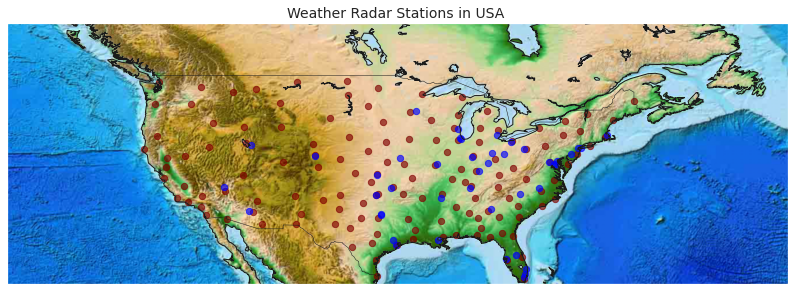

In [ ]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='cyl',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

Ws_df1=Ws_df[Ws_df['radarType']==1]
Ws_df0=Ws_df[Ws_df['radarType']==0]
my_map.scatter(Ws_df1.xm, Ws_df1.ym, color =c,  marker='o', s= 40, alpha = 0.65)
my_map.scatter(Ws_df0.xm, Ws_df0.ym, color ='blue',  marker='o', s= 40, alpha = 0.65)

plt.title(r"Weather Radar Stations in USA ", fontsize=14)        


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


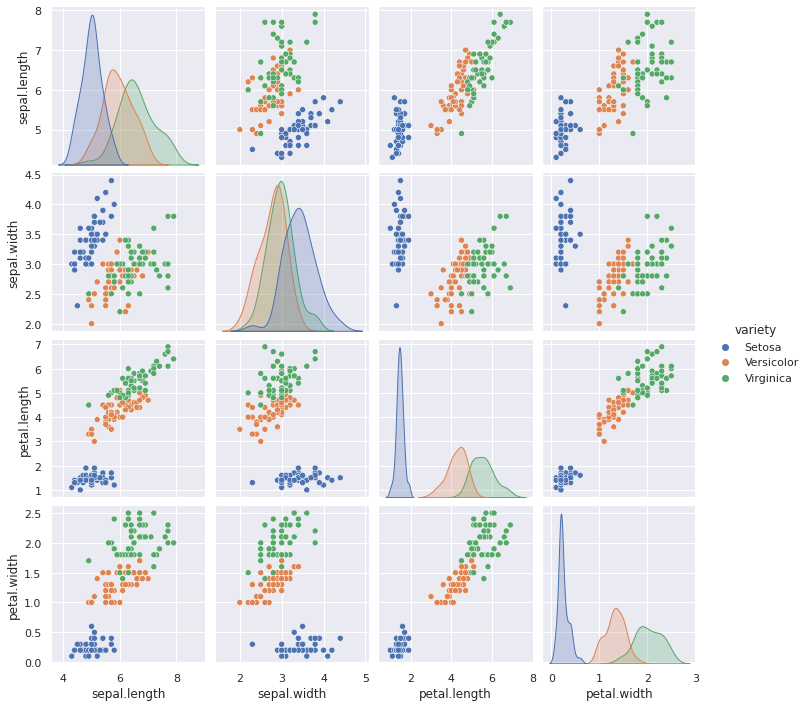

In [ ]:
sns.pairplot(iris_data,hue='variety')

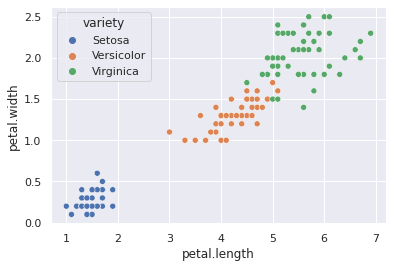

In [ ]:
sns.scatterplot(x='petal.length', y='petal.width', hue='variety', data= iris_data)
plt.show()

In [ ]:
X = iris_data[['petal.length', 'petal.width']]
#X = iris_data[['sepal.length', 'petal.width']]
y=iris_data[['variety']]
print(y)

       variety
0       Setosa
1       Setosa
2       Setosa
3       Setosa
4       Setosa
..         ...
145  Virginica
146  Virginica
147  Virginica
148  Virginica
149  Virginica

[150 rows x 1 columns]


In [ ]:
le=LabelEncoder()
yn=le.fit_transform(y)
yn

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

K-MEANS

In [ ]:
kmeans_iris = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans_iris = kmeans_iris.fit(X)

In [ ]:
etiquetas_iris = kmeans_iris.labels_ # miramos las etiquetas que les puso
print(etiquetas_iris.shape)

(150,)


In [ ]:
centros_iris = kmeans_iris.cluster_centers_ # centroides
print(centros_iris)

[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


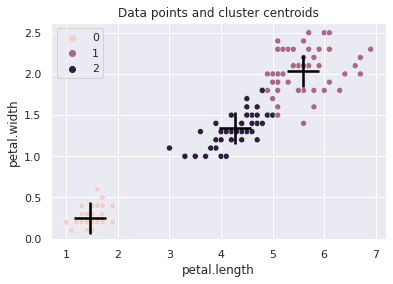

In [ ]:
sns.scatterplot(X['petal.length'], X['petal.width'], hue = etiquetas_iris)
sns.scatterplot(centros_iris[:, 0], centros_iris[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

<AxesSubplot:>

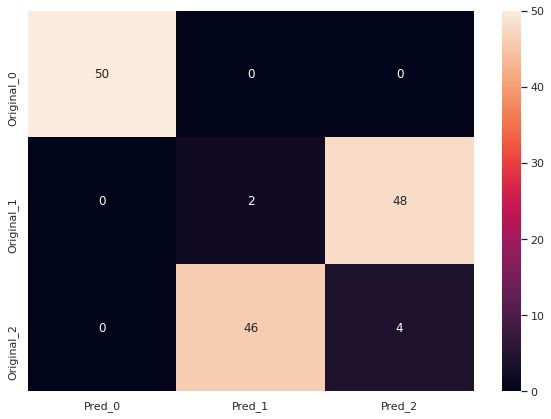

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yn, etiquetas_iris)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

DBSCAN

In [ ]:
db_iris = DBSCAN(eps=0.3, min_samples=6)


In [ ]:
db_iris.fit(X)


DBSCAN(eps=0.3, min_samples=6)

In [ ]:
# Consultamos las etiquetas
labels_iris = db_iris.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_iris = len(set(labels_iris)) - (1 if -1 in labels_iris else 0)
n_noise_iris = list(labels_iris).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_iris)
print('Estimated number of noise points: %d' % n_noise_iris)

Estimated number of clusters: 3
Estimated number of noise points: 10


In [ ]:
Xn = np.array(X)

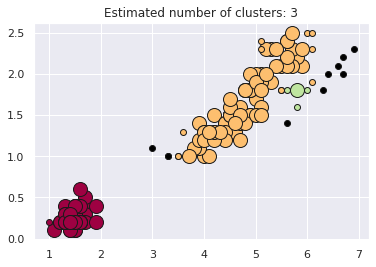

In [ ]:
plot_DBSCAN(Xn,labels_iris,db_iris,n_clusters_iris)